#### Project: Dogs VS Cats

#### Programmer: Ricardo A. Leal

#### Date: 10/1/2020

#### Skills practiced in this project: Transfer learning using VGG16 architecture, Data augmentation.

#### Data collected from: https://www.kaggle.com/c/dogs-vs-cats

##### Note:
Some of my features are processed in a similar way to what I have learn on different machine learning courses, books and websites. This is a basic project to get familiar with machine learning techniques.

In [4]:
#Libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import  Model

#Set seed to reproduce results
np.random.seed(42)
tf.random.set_seed(99)

### Get data

In [5]:
#Download the zip file with all the data from https://www.kaggle.com/c/dogs-vs-cats

!unzip -qq dogs-vs-cats.zip

In [6]:
#Check available files
!ls

dogs-vs-cats.zip  sample_data  sampleSubmission.csv  test1.zip	train.zip


In [7]:
#Unzip the test set
!unzip -qq train.zip

In [8]:
#Unzip the test set
!unzip -qq test1.zip 

In [9]:
#Check available files again
!ls

dogs-vs-cats.zip  sampleSubmission.csv	test1.zip  train.zip
sample_data	  test1			train


In [10]:
#Make the necessary folders to store the images of cats and dogs separately
!mkdir train/cat
!mkdir train/dog

In [11]:
#Move the images to their respective files
!mv train/cat*.jpg train/cat
!mv train/dog*.jpg train/dog

In [12]:
#Check the number of samples in the train set
n_train_samples = glob('train/*/*.jpg')
print("Number of samples in the train set:", len(n_train_samples))
print("Number of Cat images in the train set:", len(glob('train/cat/*.jpg')))
print("Number of Dog images in the train set:", len(glob('train/dog/*.jpg')))

Number of samples in the train set: 25000
Number of Cat images in the train set: 12500
Number of Dog images in the train set: 12500


In [13]:
#Create folders for the validation data
!mkdir validation
!mkdir validation/cat
!mkdir validation/dog

In [14]:
#Separate 20% of the cat images in the train folder to the validation folder
%cd train/cat
!mv `ls | head -1250` /content/validation/cat

/content/train/cat


In [15]:
#Go to the dog folder in the train set
%cd  /content/train/dog


/content/train/dog


In [16]:
#Separate 20% of the dog images in the train folder to the validation folder
!mv `ls | head -1250` /content/validation/dog

In [17]:
#Go back to "content" folder
%cd ../..

/content


In [18]:
#Check the number of samples in the train set
n_train_samples = glob('train/*/*.jpg')
print("Number of samples in the train set:", len(n_train_samples))
print("Number of Cat images in the train set:", len(glob('train/cat/*.jpg')))
print("Number of Dog images in the train set:", len(glob('train/dog/*.jpg')))

Number of samples in the train set: 22500
Number of Cat images in the train set: 11250
Number of Dog images in the train set: 11250


In [19]:
#Check the number of samples in the validation set
n_validation_samples = glob('validation/*/*.jpg')
print("Number of samples in the validation set:", len(n_validation_samples))
print("Number of Cat images in the validation set:", len(glob('validation/cat/*.jpg')))
print("Number of Dog images in the validation set:", len(glob('validation/dog/*.jpg')))

Number of samples in the validation set: 2500
Number of Cat images in the validation set: 1250
Number of Dog images in the validation set: 1250


### See some of the images in the train set

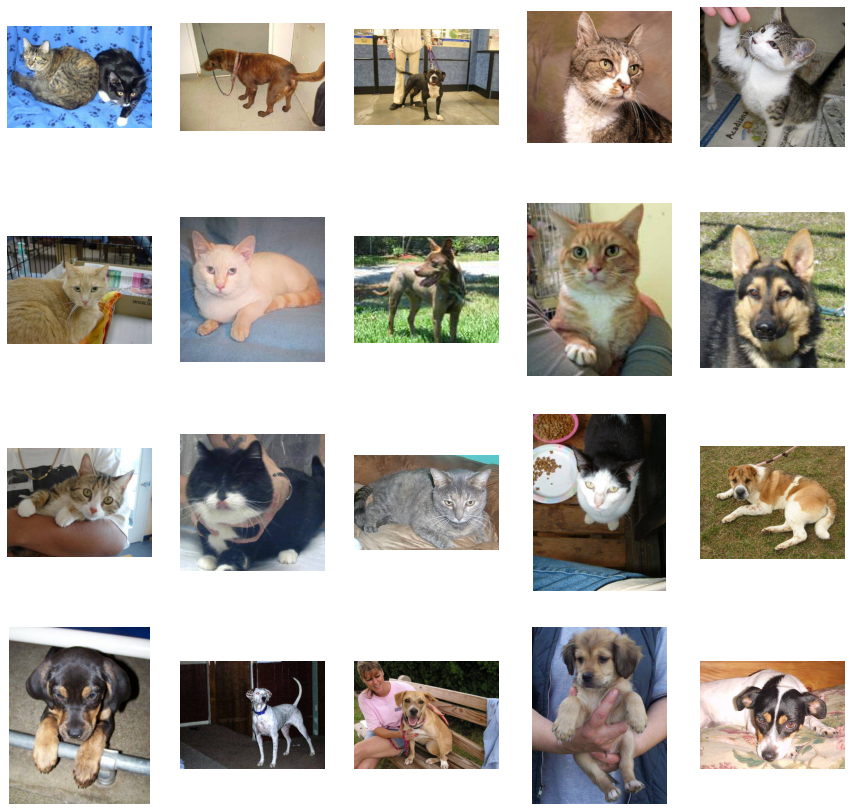

In [20]:
#Check some images in the train set
rows = 4
columns = 5

fig, axes = plt.subplots(rows, columns, figsize=(15,15))
axes = axes.ravel()

random_indexes = np.random.randint(low = 0, high = len(n_train_samples), size = rows*columns)

for i in range(0, rows*columns):
  axes[i].axis('off')
  axes[i].imshow(image.load_img(n_train_samples[random_indexes[i]]))

### Create model

In [21]:
#Model layers

#Get the layers from VGG16
vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = [224, 224, 3])
vgg.trainable = False

#Add extra layers 
x = Flatten()(vgg.output)
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.2)(x)
outputs = Dense(2, activation='softmax')(x)

58892288/58889256 [==============================] - 2s 0us/step


In [22]:
#Create model
model = Model(inputs = vgg.input, outputs = outputs)

In [23]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [24]:
#Compile model
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
batch_size = 32

In [26]:
#ImageDataGenerator
data_generator = ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True,
                                     preprocessing_function = preprocess_input)

train_generator = data_generator.flow_from_directory('train', class_mode = 'categorical', shuffle = True,
                                                      target_size=(224, 224), batch_size = batch_size)

Found 22500 images belonging to 2 classes.


In [27]:
#ImageDataGenerator
data_generator = ImageDataGenerator(preprocessing_function = preprocess_input)

validation_generator = data_generator.flow_from_directory('validation', class_mode = 'categorical', 
                                                          target_size=(224, 224), batch_size = batch_size)

Found 2500 images belonging to 2 classes.


### Train model

In [28]:
# fit the model
history = model.fit(train_generator, epochs = 3, steps_per_epoch = (len(n_train_samples) // batch_size),
                    validation_data = validation_generator, validation_steps = (len(n_validation_samples) // batch_size))

Epoch 1/3
703/703 [==============================] - 380s 541ms/step - loss: 0.4254 - accuracy: 0.9672 - val_loss: 0.0729 - val_accuracy: 0.9752
Epoch 2/3
703/703 [==============================] - 374s 532ms/step - loss: 0.0736 - accuracy: 0.9777 - val_loss: 0.0622 - val_accuracy: 0.9816
Epoch 3/3
703/703 [==============================] - 376s 534ms/step - loss: 0.0554 - accuracy: 0.9818 - val_loss: 0.0549 - val_accuracy: 0.9796


In [29]:
#Save model for future use
model.save('dogsVScats_VGG16.h5')

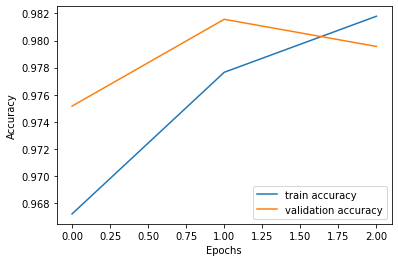

In [30]:
#Plot accuracy
plt.plot(history.history['accuracy'], label = 'train accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(loc = 'best')

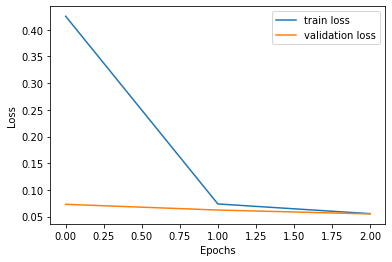

In [31]:
#Plot loss
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(loc = 'best')

### As Kaggle does not provide the solution to the dataset, I will have to evaluate the validation set to get an idea of the model's performance


In [32]:
#Evaludate model using the validation set
model.evaluate(validation_generator)

79/79 [==============================] - 18s 222ms/step - loss: 0.0548 - accuracy: 0.9796


[0.05483304336667061, 0.9796000123023987]

### Prepare the test set

In [33]:
#Make a folder for the test set
!mkdir test

In [34]:
 #Move the 'test1' folder created after unzipping data to the 'test' folder. Having this extra folder is necessary for the data augmentation using flow_from_directory
 !mv test1 test

I will rename all the files in the test set to be able to keep the order of the files provided by Kaggle:

The highest id of the pictures is 12500.jpg (which uses 5 digits).
So I will zero pad all images with ids from 1 to 9999 to add the required number of zeros they need to get to 5 digits in the filename.
Example: from 1.jpg to 00001.jpg, 9999.jpg to 09999.jpg

In [35]:
%cd test/test1

/content/test/test1


In [36]:
#Zero pad the filenames:

#Files from 1-9.jpg
!for n in $(seq 1 9); do mv $n.jpg 0000$n.jpg; done
#Files from 10-99.jpg
!for n in $(seq 10 99); do mv $n.jpg 000$n.jpg; done
#Files from 100-999.jpg
!for n in $(seq 100 999); do mv $n.jpg 00$n.jpg; done
#Files from 1000-9999.jpg
!for n in $(seq 1000 9999); do mv $n.jpg 0$n.jpg; done
'''
There is no need to zero pad files above 9999.jpg as they already have 5 digits in the filename 
and the max 12500.jpg 
'''

'\nThere is no need to zero pad files above 9999.jpg as they already have 5 digits in the filename \nand the max 12500.jpg \n'

In [37]:
#Check the names of the files
!ls

00001.jpg  01787.jpg  03573.jpg  05359.jpg  07145.jpg  08931.jpg  10717.jpg
00002.jpg  01788.jpg  03574.jpg  05360.jpg  07146.jpg  08932.jpg  10718.jpg
00003.jpg  01789.jpg  03575.jpg  05361.jpg  07147.jpg  08933.jpg  10719.jpg
00004.jpg  01790.jpg  03576.jpg  05362.jpg  07148.jpg  08934.jpg  10720.jpg
00005.jpg  01791.jpg  03577.jpg  05363.jpg  07149.jpg  08935.jpg  10721.jpg
00006.jpg  01792.jpg  03578.jpg  05364.jpg  07150.jpg  08936.jpg  10722.jpg
00007.jpg  01793.jpg  03579.jpg  05365.jpg  07151.jpg  08937.jpg  10723.jpg
00008.jpg  01794.jpg  03580.jpg  05366.jpg  07152.jpg  08938.jpg  10724.jpg
00009.jpg  01795.jpg  03581.jpg  05367.jpg  07153.jpg  08939.jpg  10725.jpg
00010.jpg  01796.jpg  03582.jpg  05368.jpg  07154.jpg  08940.jpg  10726.jpg
00011.jpg  01797.jpg  03583.jpg  05369.jpg  07155.jpg  08941.jpg  10727.jpg
00012.jpg  01798.jpg  03584.jpg  05370.jpg  07156.jpg  08942.jpg  10728.jpg
00013.jpg  01799.jpg  03585.jpg  05371.jpg  07157.jpg  08943.jpg  10729.jpg
00014.jpg  0

In [38]:
%cd ../..

/content


In [39]:
#ImageDataGenerator
generator = ImageDataGenerator(preprocessing_function = preprocess_input)

test_generator = generator.flow_from_directory(directory = 'test', class_mode= None, target_size=(224, 224),
                                                    batch_size = batch_size, shuffle = False)

Found 12500 images belonging to 1 classes.


### Predictions

In [40]:
#Predict the test set
predictions = model.predict(test_generator)
predictions = np.argmax(predictions, axis = -1)

### Check predictions

#### First 25 predictions

In [41]:
#Get the first 25 predictions
first25_predictions = pd.DataFrame(predictions[0:25])
first25_predictions.columns = ['Prediction']
first25_predictions['Prediction'].replace({0: 'Cat', 1 : 'Dog'}, inplace = True)

In [42]:
#Get the first 25 images from the test set


#List to keep the filenames
listOfImages = []

#First part of the path
filepath = 'test/test1/0000'
#Loop to get the files
for number in range(1,26):
    path = filepath + str(number) + '.jpg'
    listOfImages.append(path)

    if number >= 9:
      filepath = 'test/test1/000'

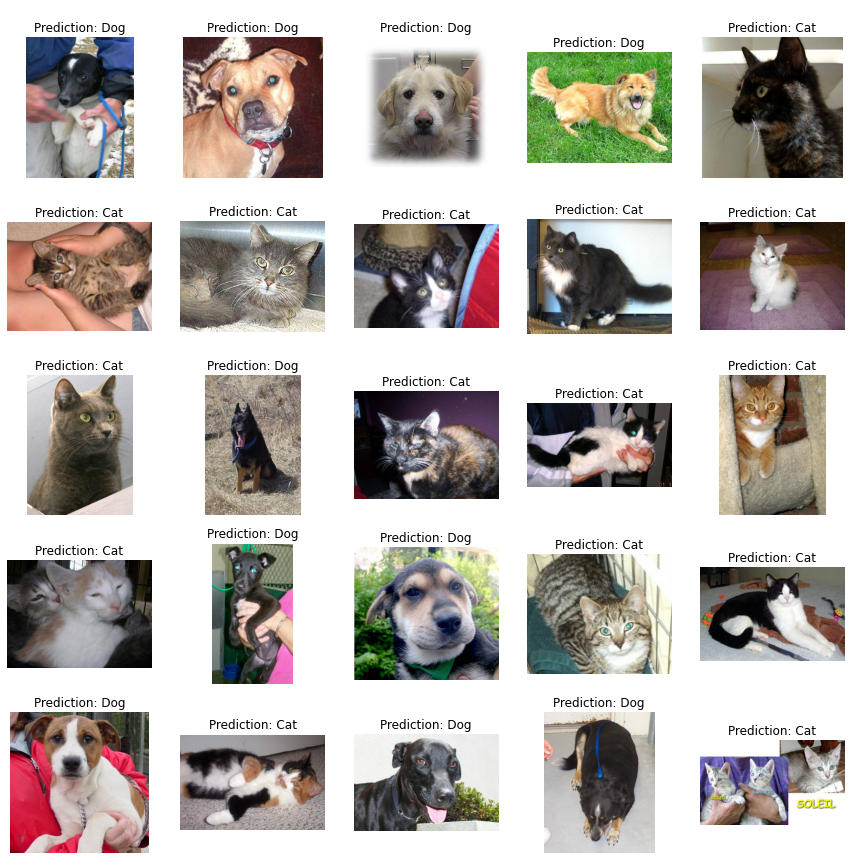

In [43]:
#See some images and their prediction
rows = 5
columns = 5

fig, axes = plt.subplots(rows, columns, figsize=(15,15))
axes = axes.ravel()

for i in range(0, rows*columns):
  axes[i].axis('off')
  axes[i].imshow(image.load_img(path = listOfImages[i]))
  axes[i].set_title("\nPrediction: {}".format(first25_predictions['Prediction'][i]))

#### Last 25 predictions

In [44]:
#Get the last 25 predictions
last25_predictions = pd.DataFrame(predictions[-25:])
last25_predictions.columns = ['Prediction']
last25_predictions['Prediction'].replace({0: 'Cat', 1 : 'Dog'}, inplace = True)

In [45]:
#Get the last 25 images from the test set


#List to keep the filenames
listOfImages = []

#First part of the path
filepath = 'test/test1/'
#Loop to get the files
for number in range(12476,12501):
    path = filepath + str(number) + '.jpg'
    listOfImages.append(path)

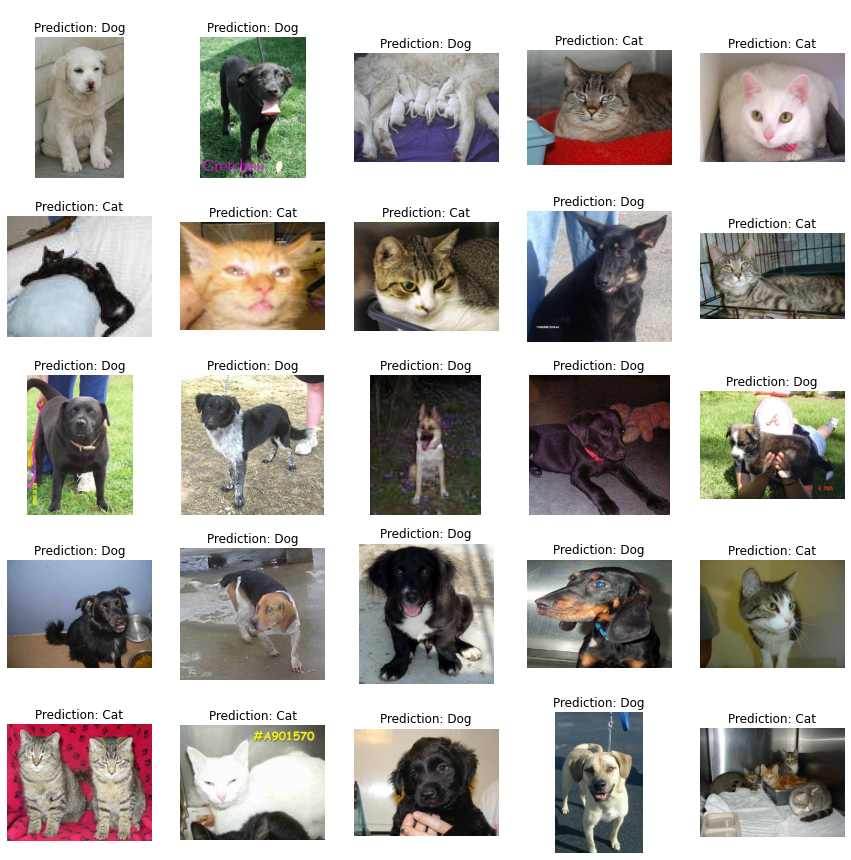

In [46]:
#See some images and their prediction
rows = 5
columns = 5

fig, axes = plt.subplots(rows, columns, figsize=(15,15))
axes = axes.ravel()

for i in range(0, rows*columns):
  axes[i].axis('off')
  axes[i].imshow(image.load_img(path = listOfImages[i]))
  axes[i].set_title("\nPrediction: {}".format(last25_predictions['Prediction'][i]))